#http://dustintran.com/blog/comments-on-mark-schmidts-icml-tutorial-for-convex-optimization
<h6>Gradients</h6>
<p>SGD covered in gracient_vincent_notes</p>
<p>There are other gradient methods..</p>
Stochastic Dual Coordinate Ascent
https://arxiv.org/abs/1209.1873
https://www.youtube.com/watch?v=wlO7FbKAfm0


In [1]:
import numpy as np
import tensorflow as tf



In [ ]:
#tensorboard github example for MNIst, this uses namespace, could use as example for other
#runs. This is for metrics/save/tensorboard. 

def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean('mean',mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        
        




In [2]:
#t.fgradients exampe. this is close? doesnt use tf.gradients
#bad no directory 
#good stores graph not just vars
#does grad_scalar_summary work for? 
import tensorflow as tf

def T(g, decay=1.0):
    return decay*g


x=tf.Variable(10.0, name="x")
b=tf.placeholder(tf.float32)
xx_b = 0.5 * tf.pow(x-b,2)
y = xx_b

learning_rate = 1.0
opt = tf.train.GradientDescentOptimizer(learning_rate)
gv = opt.compute_gradients(y,[x])
decay = 0.9 #need for ?
tgv = [ (T(g,decay=decay),v) for (g,v) in gv]
apply_transform_op = opt.apply_gradients(tgv)

(dydx,_) = tgv[0]
x_scalar_summary = tf.summary.scalar("x",x)
grad_scalar_summary = tf.summary.scalar("dydx",dydx)

with tf.Session() as sess:
    merged = tf.summary.merge()
    tensorboard_data_dump = '.'
    writer = tf.train.SummaryWriter(tensorboard_data_dump,sess.graph)


TypeError: merge() missing 1 required positional argument: 'inputs'

In [2]:
import theano
import theano.tensor as T
import numpy as np
import time


In [7]:
X = theano.shared(value=np.asarray([[0, 1], [1, 0], [0, 0], [1, 1]]), name='X')
y = theano.shared(value=np.asarray([[0], [0], [1], [1]]), name='y')
rng = np.random.RandomState(1234)
LEARNING_RATE = 0.1

def layer(*shape):
    mag = 4. * np.sqrt(6. / sum(shape))
    return theano.shared(value=np.asarray(rng.uniform(low=-mag, high=mag,
    	   size=shape), dtype=theano.config.floatX), name='W', borrow=True, strict=False)

W1 = layer(2, 5)
W2 = layer(5, 1)
b1 = layer(5)
b2 = layer(1)

output = T.nnet.sigmoid(T.dot(T.nnet.relu(T.dot(X, W1) + b1), W2) + b2)
cost = T.mean((y - output) ** 2)
grad_W1 = T.grad(cost,W1)
print("W1 gradient:",grad_W1)

updates = [(W1, W1 - LEARNING_RATE * grad_W1),
           (W2, W2 - LEARNING_RATE * T.grad(cost, W2)),
           (b1, b1 - LEARNING_RATE * T.grad(cost, b1)),
           (b2, b2 - LEARNING_RATE * T.grad(cost, b2))]

train = theano.function(inputs=[], outputs=[], updates=updates)
test = theano.function(inputs=[], outputs=cost)

gradients = [T.grad(cost, W1) for W1 in model.get_params()]

W1 gradient: (dmean/dW)


NameError: name 'model' is not defined

In [6]:
print('Error before:', test())
start = time.time()
for i in range(10000):
    train()
end = time.time()
print('Error after:', test())
print('Time (s):', end - start)

Error before: 0.37268053656395866
Error after: 0.00038868163847517777
Time (s): 0.38109898567199707


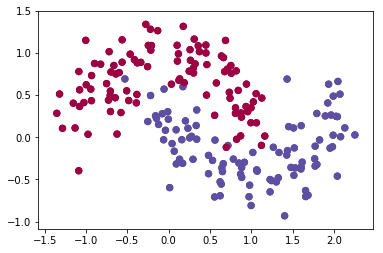

In [12]:
# Generate a dataset and plot it
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [14]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength
#First implement the loss function we defined above. We use this to evaluate how well our model is doing:

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss


In [15]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [19]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
     
    return model

In [20]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068901
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


NameError: name 'plot_decision_boundary' is not defined